# <center> Grupo 01 - DEX04: Deliverable 2

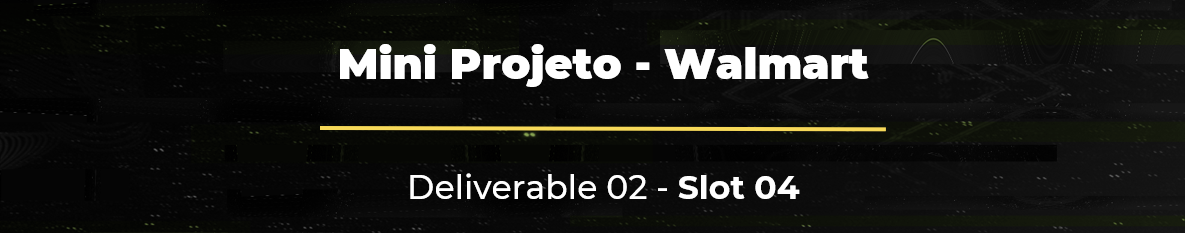

## <center> Dataset

Histórico de vendas semanais de 2010-02-05 até 2012-11-01. Apresenta os seguintes campos:

**Store** - the store number

**Date** - the week of sales

**Weekly_Sales** - sales for the given store

**Holiday_Flag** - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week\
**Temperature** - Temperature on the day of sale

**Fuel_Price** - Cost of fuel in the region

**CPI** – Prevailing consumer price index

**Unemployment** - Prevailing unemployment rate

**Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12,
29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 
27-Dec-13

## <center> Plano de Ação

Procuramos resolver o enunciado do problema criando um plano de ação. As etapas desse plano estão enumeradas abaixo:

1.   Data Exploration
2.   Exploratory Data Analysis (EDA)
3.   Sales Analytics

*    Faturamento acumulado e faturamento médio
*    Semanas em que o faturamento é acima da média
*    Lojas que melhor performam nos principais feriados do ano

4.   Conclusões

# <center> 1. Explorando os dados

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

import datetime as dt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]

from IPython.display import display

In [ ]:
#Importing the dataset

df = pd.read_csv('/content/Walmart.csv')

display(df.head())
print('\n Análise: The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



 Análise: The Datset consists of 8 features & 6435 samples.


### Selecionando Target, Features e trabalhando datas

In [ ]:
target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

In [ ]:
df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


### Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   weekday       6435 non-null   int64         
 9   week          6435 non-null   int64         
 10  month         6435 non-null   int64         
 11  year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


### Checando linhas únicas para cada Feature

In [ ]:
df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
week              52
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

### Verificando Existência de duplicatas

In [ ]:
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m O dataframe não apresenta duplicatas')
else:
    print(f'\n\033[1mInference:\033[0m Número de duplicatas removidas ---> {rs-df.shape[0]}')


Inference: Número de duplicatas removidas ---> 0


### Estatísticas

In [ ]:
display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,26.000000,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,14.511794,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,14.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,26.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,38.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,52.000000,12.000000,2012.000000


# <center> 2. Analise Exploratória (EDA)

### Distribuição da variável target

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


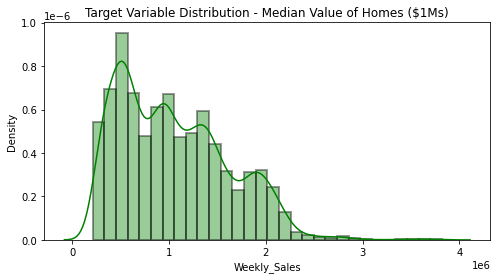

In [ ]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

### Distribuição das Features e Identificação de Outliers

In [ ]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:
        cf.append(nu.index[i])
    else: nf.append(nu.index[i])

nf.remove("Date")

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 2 categorical features.


                                                Numeric Features Distribution                                                 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

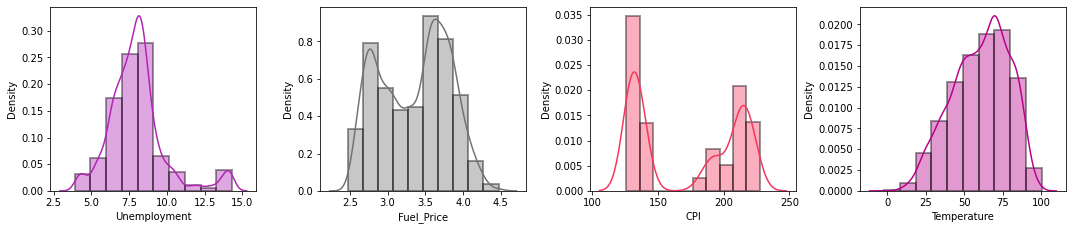

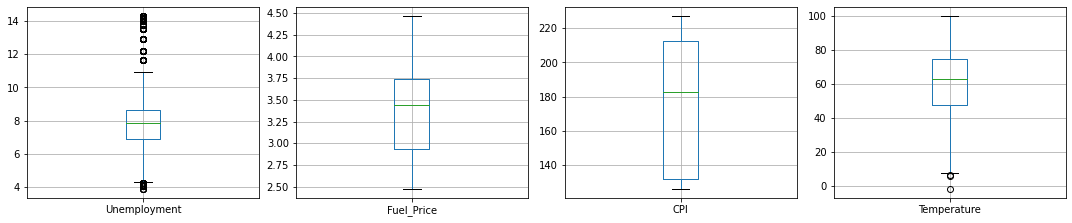

In [ ]:
print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

### Visualizando correlações

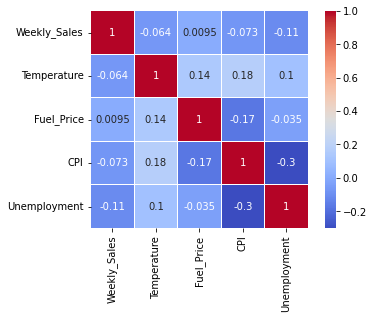

In [ ]:
sns.heatmap(data=df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), annot=True, linewidths=0.2, cmap='coolwarm', square=True);

# <center> 3. Sales Analytics

### Visão geral sobre o histórico de faturamento

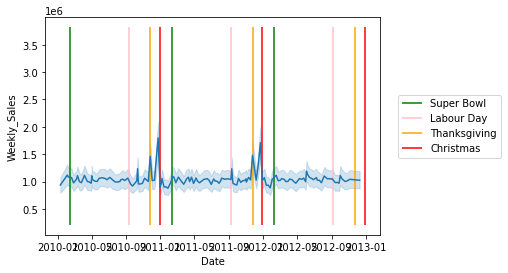

In [ ]:
# Feriados
super_bowl = [dt.datetime(2010, 2, 12), dt.datetime(2011, 2, 11), dt.datetime(2012, 2, 10)]
labour_day = [dt.datetime(2010, 9, 10), dt.datetime(2011, 9, 9), dt.datetime(2012, 9, 7)]
thanksgiving = [dt.datetime(2010, 11, 26), dt.datetime(2011, 11, 25), dt.datetime(2012, 11, 23)]
christmas = [dt.datetime(2010, 12, 31), dt.datetime(2011, 12, 30), dt.datetime(2012, 12, 28)]
y_min = df.Weekly_Sales.min()
y_max = df.Weekly_Sales.max()

# Plot do histórico de faturamento
sns.lineplot(data = df, x = "Date", y = "Weekly_Sales")
plt.vlines(x = super_bowl, ymin=y_min, ymax=y_max, colors='green', label='Super Bowl')
plt.vlines(x = labour_day, ymin=y_min, ymax=y_max, colors='pink', label='Labour Day')
plt.vlines(x = thanksgiving, ymin=y_min, ymax=y_max, colors='orange', label='Thanksgiving')
plt.vlines(x = christmas, ymin=y_min, ymax=y_max, colors='red', label='Christmas')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

### Faturamento médio (todas as lojas)

In [ ]:
media_faturamento_geral = math.ceil(df['Weekly_Sales'].mean())
print(f"Média de Faturamento total: {media_faturamento_geral}")

Média de Faturamento total: 1046965


### TOP 10 Lojas em Média de Faturamento

In [ ]:
data = df.groupby('Store').agg({'Weekly_Sales': ['min','max','mean', np.sum]}).sort_values(('Weekly_Sales','mean'), ascending = False).head(10)

data.reset_index(inplace=True)

data.head()

Store Weekly_Sales                                        
                 min         max          mean           sum
0    20   1761016.51  3766687.43  2.107677e+06  3.013978e+08
1     4   1762539.30  3676388.98  2.094713e+06  2.995440e+08
2    14   1479514.66  3818686.45  2.020978e+06  2.889999e+08
3    13   1633663.12  3595903.20  2.003620e+06  2.865177e+08
4     2   1650394.44  3436007.68  1.925751e+06  2.753824e+08

In [ ]:
data.sort_values(('Weekly_Sales','sum'), ascending = False).head(1)

Store Weekly_Sales                                        
                 min         max          mean           sum
0    20   1761016.51  3766687.43  2.107677e+06  3.013978e+08

**Inferência:** A loja 20 se mostra uma candidata ao investimento, já que tem a maior média de faturamento e o maior faturamento acumulado.

### Quantidade de vezes em que cada lojas supera a média de faturamento geral

Semanas em que o faturamento é acima da média

In [ ]:
data = df[["Date","Store","Weekly_Sales"]]
data['Superou a média'] = np.where(df["Weekly_Sales"]>media_faturamento_geral,1,0)

summarized = data.groupby('Store').agg({'Superou a média': np.sum}).sort_values('Superou a média', ascending = False)
summarized_results = summarized[ summarized['Superou a média'] >= summarized['Superou a média'].max()]
summarized_results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Superou a média
Store,
1,143
19,143
39,143
4,143
31,143
6,143
28,143
27,143
24,143


In [ ]:
summarized_results.count()

Superou a média    15
dtype: int64

**Inferência:** 15 Lojas se destacam com grande número de vendas acima da média.

Dentre essas lojas, vemos novamente a Loja 20

### Lojas que melhor performam nos feriados nacionais

Definindo funções úteis

In [ ]:
# Criando uma função para pegar as semanas das datas.
def week_getter(datelist):
  weeks = set()
  for date in datelist:
    if date[5] == '0':
      yr = int(date[:4])
      mth = int(date[6:7])
      day = int(date[8:10])
      weeks.add(dt.date(yr, mth, day).isocalendar()[1])
    else:
      yr = int(date[:4])
      mth = int(date[5:7])
      day = int(date[8:10])
      weeks.add(dt.date(yr, mth, day).isocalendar()[1])
  return weeks

# Função para filtrar o dataframe por lista com números de semanas dos feriados
def df_weekfilter(dataframe, weeklist):
    return dataframe[dataframe.week.isin(weeklist)]

def mean_getter(dataset, column):
  return dataset[column].mean()

Datas dos Feriados

In [ ]:
# Criando listas com strings das datas de feriado para comparação futura
christmas_dates = ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'] 
thanksgiving_dates = ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']
labourday_dates = ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']
superbowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']

Início do Processamento

In [ ]:
# Filtrando o dataset por vendas nos feriados de natal (Usando dataset sem Outliers)
ds_christmas = df_weekfilter(df, week_getter(christmas_dates))
ds_thanksgiving = df_weekfilter(df, week_getter(thanksgiving_dates))
ds_labourday = df_weekfilter(df, week_getter(labourday_dates))
ds_superbowl = df_weekfilter(df, week_getter(superbowl_dates)) 

In [ ]:
# Observando quais lojas mais venderam no feriado do Natal de 2010
chr_2010 = ds_christmas[['Store', 'Date', 'Weekly_Sales']][ds_christmas['Date'
          ].dt.year == 2010].sort_values('Weekly_Sales', ascending=False)

chr_2011 = ds_christmas[['Store', 'Date', 'Weekly_Sales']][ds_christmas['Date'
          ].dt.year == 2011].sort_values('Weekly_Sales', ascending=False)

In [ ]:
# Observando as vendas semanais nos períodos de ação de graças.
thx_2010 = ds_thanksgiving[['Store', 'Date', 'Weekly_Sales']][ds_thanksgiving[
          'Date'].dt.year == 2010].sort_values('Weekly_Sales', ascending=False)
thx_2011 = ds_thanksgiving[['Store', 'Date', 'Weekly_Sales']][ds_thanksgiving[
          'Date'].dt.year == 2011].sort_values('Weekly_Sales', ascending=False)
thx_2012 = ds_thanksgiving[['Store', 'Date', 'Weekly_Sales']][ds_thanksgiving[
          'Date'].dt.year == 2012].sort_values('Weekly_Sales', ascending=False)

In [ ]:
# Observando as vendas semanais nos períodos do dia do trabalho.
lab_2010 = ds_labourday[['Store', 'Date', 'Weekly_Sales']][ds_labourday[
          'Date'].dt.year == 2010].sort_values('Weekly_Sales', ascending=False)
lab_2011 = ds_labourday[['Store', 'Date', 'Weekly_Sales']][ds_labourday[
          'Date'].dt.year == 2011].sort_values('Weekly_Sales', ascending=False)
lab_2012 = ds_labourday[['Store', 'Date', 'Weekly_Sales']][ds_labourday[
          'Date'].dt.year == 2012].sort_values('Weekly_Sales', ascending=False)

In [ ]:
# Observando as vendas semanais nos períodos do superbowl.
super_2010 = ds_superbowl[['Store', 'Date', 'Weekly_Sales']][ds_superbowl[
          'Date'].dt.year == 2010].sort_values('Weekly_Sales', ascending=False)
super_2011 = ds_superbowl[['Store', 'Date', 'Weekly_Sales']][ds_superbowl[
          'Date'].dt.year == 2011].sort_values('Weekly_Sales', ascending=False)
super_2012 = ds_superbowl[['Store', 'Date', 'Weekly_Sales']][ds_superbowl[
          'Date'].dt.year == 2012].sort_values('Weekly_Sales', ascending=False)

In [ ]:
# Mostrando as lojas que estão acima da média para cada feriado: Superbowl

best10_superbowl = super_2011[super_2011['Weekly_Sales'] >
                mean_getter(super_2011, 'Weekly_Sales')].head(20)

In [ ]:
# Mostrando as lojas que estão acima da média para cada feriado: Dia do Trabalho

lab_12_11 = lab_2012[lab_2012['Weekly_Sales'] >
            mean_getter(lab_2012, 'Weekly_Sales')].merge(lab_2011[
            lab_2011['Weekly_Sales'] > mean_getter(lab_2011, 'Weekly_Sales')],
            how='inner', on=['Store'])

best_labor = lab_2010[lab_2010['Weekly_Sales'] > mean_getter(lab_2010,
            'Weekly_Sales')].merge(lab_12_11[lab_12_11['Weekly_Sales_y'] 
            > mean_getter(lab_12_11, 'Weekly_Sales_y')], how='inner',
            on='Store')

In [ ]:
# Mostrando as lojas que estão acima da média para cada feriado: Ação de Graças
best_thx = thx_2011[thx_2011['Weekly_Sales'] > mean_getter(thx_2011, 
           'Weekly_Sales')].merge(thx_2010[thx_2010['Weekly_Sales'] > 
           mean_getter(thx_2010, 'Weekly_Sales')], how='inner', on=['Store']
           ).drop_duplicates(subset=["Store"], keep='first')

In [ ]:
# Mostrando as lojas que estão acima da média para cada feriado: Natal
best_chr = chr_2011[chr_2011['Weekly_Sales'] > mean_getter(chr_2011, 
           'Weekly_Sales')].merge(chr_2010[chr_2010['Weekly_Sales'] > 
           mean_getter(chr_2010, 'Weekly_Sales')], how='inner', on=['Store']
           ).drop_duplicates(subset=["Store"], keep='first')


#### Rersultado: Lojas que se destacam nos feriados

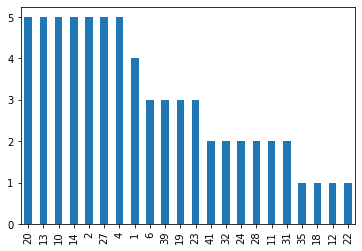

In [ ]:
#Segregar as lojas mais bem colocadas nos datasets dos feriados
best_stores = pd.Series(list(best_chr['Store']) + list(best_thx['Store']) + 
                        list(best_labor['Store']) + 
                        list(best10_superbowl['Store']), name='Lojas')
best_stores.value_counts().plot(kind='bar')

# <center> 4. Conclusões

A Loja 20 se mostra a mais indicada para receber o investimento.

**Motivo:** A loja se destacou positivamente em todas as questões de negócio analisadas neste relatório. 

Apresenta o melhor número de faturamento, assim como se mostra capaz de manter seu faturamento acima da média geral. E também, tem ótima performance nos dias festivos.

Logo, espera-se que essa seja a loja com o melhor retorno sobre o investimento, ou ainda, aquela que possa trazer o retorno sobre o investimento em um menor período de tempo.